This notebook can be viewed as a walkthrough to the process of using the Digital Connector Python bridge to create and run recipes. To do so, we will translate the already existing recipes in the [Digital Connector repository](https://github.com/FutureCitiesCatapult/TomboloDigitalConnector). At the end of this notebook:

* We will be able to use different Digital Connector recipe fields
* We will be able combine these fields to create new ones
* We will be able to run the recipe using the Python bridge
* We will be able to visualise the result

Before we begin please make sure Digital Connector is downloaded and installed. Also please make sure you've downloaded the python bridge [from this repository](https://github.com/FutureCitiesCatapult/digital-connector-python) 

In [13]:
### We will be using geopandas and matplotlib to visualise our output
import geopandas as gpd
import os
from pathlib import Path
from matplotlib import pyplot as plt

home_dir = str(Path.home())

%matplotlib inline

## Step 1: Clone the DC Python bridge repo

We already cloned the python bridge for this tutorial, but if you fancy doing it yourself:

* Create a working directory folder 
* Navigate to this folder
* Use the command: 

```bash
git clone https://github.com/FutureCitiesCatapult/digital-connector-python.git
``` 





## Step 2: Install Anaconda (if you are on windows)

Anaconda is a complete python distribution that includes ipython and jupyter as default. It works great on windows machines so it is recommended. You can download it from [here](https://www.anaconda.com/download/#windows). Go for the Python3 version

## Step 3: Import all the libraries we will be using

For this tutorial, we will be using the following python libraries. For this tutorial they should be already installed in your system but if not you can do it by typing:

```bash
pip install <library name>
``` 
in the Anaconda command prompt (you can look this up by typing anaconda command prompt on windows search)

We will be using:
* geopandas: for loading the exports
* matplotlib: for visualing the results

matplotlib comes as default in Anaconda. However we will need to install geopandas ourselves. Please bring the Anaconda command prompt window and type 
```bash
conda install -c conda-forge geopandas
```


Moreover, we need to import the python bridge. We can do this by using the jupyter %run  wildcard

In [14]:
### Please replace your path to the recipe.py file located in the digital-connector-python
%run os.path.join(home_dir, 'Desktop/python_library_dc/digital-connector-python/recipe.py')
dc_dir = '/Desktop/TomboloDigitalConnector'

## Step 4: Running a basic recipe

A recipe is essential a json file that includes all instructions to the Digital Connector on how to compute an output file containing the results of data manipulation. We will use the dedicated Python Library that abstracts the creation of the json file to simple Python arguments. For reference, at each step we will show the resulted json structure as well as the output of the computation.

Every Digital Connector recipe will start with:
* a specification of the importers that are will be used and
* the output geometry, which is referred to as *subject*. In this case, it will be local authorities.

Don't forget you can use the 

```bash
Shift + Tab 
```
key combination to check out what a class expects.

In [15]:
### subject_geometry is the geometry of our final exporter file. We specify the geometry level and we 
### define a match rule that extracts the Greater London area geometry. 
subject_geometry = Subject(subject_type_label='localAuthority',provider_label='uk.gov.ons',
                  match_rule=Match_Rule(attribute_to_match_on="label", pattern="E090%"))

Let's break down the Subject class. This is the base geometry that will be used to calculate the fields. This is specified through **subject_type_label**. In this case, it is the **<font color='red'>localAuthority</font>**. The geometry data are fetched through importers, specified by the **provider_label** argument. In this case, we are using the data from **<font color='red'>uk.gov.ons</font>**. The third argument is the **match_rule**. This argument accepts a **Match_Rule** object that interacts with the postgresql database to fetch the desired data. In this case we are matching on local authotity label using the pattern that corresponds to London.

Note that **subject_type_label**, **provider_label** and **attribute_to_match_on** are importer specific. You can check out what values they expect on github.

Next, we need to specify our importer. We do this using the Datasource class:

In [16]:
### localAuthority is the geometry level that we are interested in. 

localAuthority = Datasource(importer_class='uk.org.tombolo.importer.ons.OaImporter',
                            datasource_id='localAuthority')



In the Datasource object we specify the full Digital Connector path using **importer_class**. In this case, we need the **<font color='red'>uk.org.tombolo.importer.ons.OaImporter</font>**. Since an importer can import several attributes in the database, we need to specify the one we are interested in. We do this by **datasource_id**. Note that a Datasource object can take more arguments such as geography_scope, temporal_scope etc. Check the documentation by Shift + Tab for more details.

Next, we use the Dataset class to wrap our objects.

In [17]:
### We will wrap the above in a Dataset object and build the recipe. Notice that there are no fields yet as we haven't 
### specified any
dataset = Dataset(subjects=[subject_geometry], fields=[],
                  datasources=[localAuthority])


The Dataset class accepts three arguments. Our subjects, our fields and our datasources (importers). We will pass this to a Recipe field so we can build and run our recipe. We will use the console_print argument to view the resulted json

In [18]:
recipe = Recipe(dataset)
recipe.build_recipe(output_location="test.json",
                   console_print=True)

{
  "dataset": {
    "subjects": [
      {
        "subjectType": "localAuthority",
        "provider": "uk.gov.ons",
        "matchRule": {
          "attribute": "label",
          "pattern": "E090%"
        }
      }
    ],
    "datasources": [
      {
        "importerClass": "uk.org.tombolo.importer.ons.OaImporter",
        "datasourceId": "localAuthority"
      }
    ],
    "fields": []
  },
  "exporter": "uk.org.tombolo.exporter.GeoJsonExporter",
  "timeStamp": false
}


Lets pass the above recipe to the Digital Connector and see what we will get. We do that by calling the Digital Connector using subprocess and then use geopandas to visualise our output:

In [20]:
dc_dir = '/Desktop/TomboloDigitalConnector'
recipe.run_recipe(tombolo_path=home_dir + dc_dir,
                  clear_database_cache=False,
                  output_path = home_dir + '/local_authority.json')

b':compileJava UP-TO-DATE\n'
b':processResources UP-TO-DATE\n'
b':classes UP-TO-DATE\n'
b':runExportHelp UP-TO-DATE\n'
b':runExport\n'
b'2018-03-16 12:11:37.692 [main] WARN  n.s.e.config.ConfigurationFactory - No configuration found. Configuring ehcache from ehcache-failsafe.xml  found in the classpath: jar:file:/Users/tbantis/.gradle/caches/modules-2/files-2.1/net.sf.ehcache/ehcache/2.10.3/cf74f9a4a049f181833b147a1d9aa62159c9d01d/ehcache-2.10.3.jar!/ehcache-failsafe.xml\n'
b'2018-03-16 12:11:39.969 [main] INFO  uk.org.tombolo.AbstractRunner - Setting file download cache: /tmp\n'
b"2018-03-16 12:11:40.138 [main] INFO  org.ehcache.core.EhcacheManager - Cache 'fields' created in EhcacheManager.\n"
b'2018-03-16 12:11:40.484 [main] INFO  u.o.t.importer.AbstractImporter - Skipped importing uk.org.tombolo.importer.ons.OaImporter:localAuthority as this import has been completed previously\n'
b'2018-03-16 12:11:40.484 [main] INFO  u.o.t.execution.DataExportEngine - Exporting ...\n'
b'2018-03-1

Lets load back the result and visualise it using geopandas:

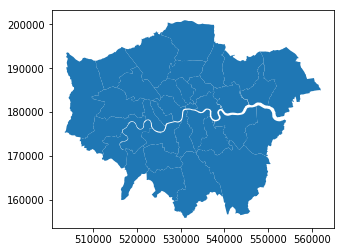

In [22]:
gdf = gpd.read_file(home_dir + '/local_authority.json')
gdf.to_crs(epsg=27700).plot()

In [23]:
### This is what the output file looks like

gdf.head()

,name,label,geometry
0,City of London,E09000001,"POLYGON ((-0.0968 51.5233, -0.0964 51.5228, -0..."
1,Barking and Dagenham,E09000002,"(POLYGON ((0.1482 51.5968, 0.1481 51.5964, 0.1..."
2,Barnet,E09000003,"POLYGON ((-0.199 51.6682, -0.1966 51.6681, -0...."
3,Bexley,E09000004,"(POLYGON ((0.1439 51.5077, 0.1475 51.5066, 0.1..."
4,Brent,E09000005,"POLYGON ((-0.2671 51.6004, -0.2597 51.5942, -0..."


## Step 5: Recreating a Digital Connector recipe

That was simple enough, but lets try now to create something more complicated that involves fields. We will use [london-cycle-traffic-air-quality.json](https://github.com/FutureCitiesCatapult/TomboloDigitalConnector/blob/master/src/main/resources/executions/examples/london-cycle-traffic-air-quality.json) as an guiding example.

In [46]:
### First we define our subject geometry as before
subject_geometry = Subject(subject_type_label='localAuthority', provider_label='uk.gov.ons',
                  match_rule=Match_Rule(attribute_to_match_on="label", pattern="E090%"))

### We then specify our importers

localAuthority = Datasource(importer_class='uk.org.tombolo.importer.ons.OaImporter',
                            datasource_id='localAuthority')

trafficCounts = Datasource(importer_class='uk.org.tombolo.importer.dft.TrafficCountImporter',
                           datasource_id='trafficCounts',
                           geography_scope = ["London"]) ## Note that geography scope is specific to that importer

airQualityControl = Datasource(importer_class='uk.org.tombolo.importer.lac.LAQNImporter',
                               datasource_id='airQualityControl')

### For our convenience we will wrap all our importers in a list

importers = [localAuthority, trafficCounts, airQualityControl]


Now let's specify our fields. We do this by creating our fields and combining them to achieve the desired output. [london-cycle-traffic-air-quality.json](https://github.com/FutureCitiesCatapult/TomboloDigitalConnector/blob/master/src/main/resources/executions/examples/london-cycle-traffic-air-quality.json) exports two fields:

* The mean value of Nitrogen Dioxide for all points inside a local authority
* The fraction of bicycles to cars/taxis

In [47]:
### We grab the attribute from our importer for NO2. We do that by invoking an AttributeMatcher which will essentially look 
### look through the database and find the attribute with the corresponding label. 
### Notice that we only need to specify the provider and the attribute label, and the attribute label should
### be the SAME as it appears in the importer (and as an result, in the psql database).

no_2_attribute = AttributeMatcher(provider='erg.kcl.ac.uk',
                                     label='NO2 40 ug/m3 as an annual mean')


In [48]:
### We then pass the attribute to a LatestValueField field. Digital Connector can store timeseries within the 
### LatestValueField, but we are only interested in the most recent one. Invoking LatestValueField 
### will allow us to extract the latest value of the time series. We can now use any label we wish to name the field.
### For consistency, the label is the same as the attribute in the importer

no_2_field = LatestValueField(attribute_matcher=no_2_attribute,
                         label='NO2 40 ug/m3 as an annual me')

airQualityControl importer fetches data from air quality sensors installed by Environmental Research Group Kings College London. The data are time series with point geography corresponding to the coordiantes where the sensors were installed. To aggregate them on our subject level (local authority) we need to wrap them inside a **GeographicAggregationField**. The GeographicAggregationField accepts as arguments the geometry of the no_2_field, the no_2_field itself as well as the aggregation function.

In [49]:
subject_geometry_laq = Subject(provider_label='erg.kcl.ac.uk',subject_type_label='airQualityControl')

g_no_2_field = GeographicAggregationField(field=no_2_field,
                                          function='mean',
                                          label='NitrogenDioxide',
                                          subject = subject_geometry_laq)

At this stage, this is what the recipe looks like:
    

In [50]:
dataset = Dataset(subjects=[subject_geometry], fields=[g_no_2_field],
                  datasources=importers)
recipe = Recipe(dataset)
recipe.build_recipe(output_location=None,
                   console_print=True)

{
  "dataset": {
    "subjects": [
      {
        "subjectType": "localAuthority",
        "provider": "uk.gov.ons",
        "matchRule": {
          "attribute": "label",
          "pattern": "E090%"
        }
      }
    ],
    "datasources": [
      {
        "importerClass": "uk.org.tombolo.importer.ons.OaImporter",
        "datasourceId": "localAuthority"
      },
      {
        "importerClass": "uk.org.tombolo.importer.dft.TrafficCountImporter",
        "datasourceId": "trafficCounts",
        "geographyScope": [
          "London"
        ]
      },
      {
        "importerClass": "uk.org.tombolo.importer.lac.LAQNImporter",
        "datasourceId": "airQualityControl"
      }
    ],
    "fields": [
      {
        "fieldClass": "uk.org.tombolo.field.aggregation.GeographicAggregationField",
        "label": "NitrogenDioxide",
        "subject": {
          "subjectType": "airQualityControl",
          "provider": "erg.kcl.ac.uk"
        },
        "function": "mean",
        "f

Now lets create our second field. This will be the fraction of bicycle to cars inside our subject geometry (local authority). First we need to grab our attributes using a LatestValueField in combination with an attribute matcher.
Then, we need to reaggregate them to our base subject geometry using a GeographicAggregationField. Once we do this,
we can wrap the resulted fields in a ArithmeticField that will perform the calculation.

In [51]:
### First, lets get our attributes

countPedalCycles_attribute = AttributeMatcher(provider='uk.gov.dft',
                                     label='CountPedalCycles')

countPedalCycles_field = LatestValueField(attribute_matcher=countPedalCycles_attribute,
                                          label='CountPedalCycles')

countCarTaxis_attribute = AttributeMatcher(provider='uk.gov.dft',
                                     label='CountCarsTaxis')

countCarTaxis_field = LatestValueField(attribute_matcher=countCarTaxis_attribute,
                                          label='CountCarsTaxis')



### Since we will be doing the same operation twice, one for the cycles and one for the cars, it is convenient
### to use a for loop on the attribute labels.
fields = ['countPedalCycles_field','countCarTaxis_field']

f={}

subject_geometry_dft = Subject(provider_label='uk.gov.dft',
                               subject_type_label='trafficCounter')
for i in fields:
    f['geo_{0}'.format(i)] = GeographicAggregationField(subject= subject_geometry_dft,
                                                           field=eval(('{0}').format(i)),
                                                           function='sum',
                                                           label='geo_{0}'.format(i))

    
    

Notice that dictionary f now holds our fields. Lets calculate the fraction using the **ArithmeticField**

In [52]:
bicycleFraction = ArithmeticField(operation_on_field_1=f['geo_countPedalCycles_field'],
                                  operation_on_field_2=f['geo_countCarTaxis_field'],
                                  operation='div',
                                  label='BicycleFraction')


As before, lets gather all our objects in a Dataset object, build and run our recipe

In [53]:
dataset = Dataset(subjects=[subject_geometry], fields=[g_no_2_field, bicycleFraction],
                  datasources=importers)

recipe = Recipe(dataset)
recipe.build_recipe(output_location=None,
                   console_print=False)

recipe.run_recipe(tombolo_path=home_dir + dc_dir,
                  clear_database_cache=False,
                  output_path = home_dir + '/london-cycle-traffic-air-quality.json')


b'Starting a Gradle Daemon (subsequent builds will be faster)\n'
b':compileJava UP-TO-DATE\n'
b':processResources UP-TO-DATE\n'
b':classes UP-TO-DATE\n'
b':runExportHelp UP-TO-DATE\n'
b':runExport\n'
b'2018-03-16 12:49:54.053 [main] WARN  n.s.e.config.ConfigurationFactory - No configuration found. Configuring ehcache from ehcache-failsafe.xml  found in the classpath: jar:file:/Users/tbantis/.gradle/caches/modules-2/files-2.1/net.sf.ehcache/ehcache/2.10.3/cf74f9a4a049f181833b147a1d9aa62159c9d01d/ehcache-2.10.3.jar!/ehcache-failsafe.xml\n'
b'2018-03-16 12:49:56.872 [main] INFO  uk.org.tombolo.AbstractRunner - Setting file download cache: /tmp\n'
b"2018-03-16 12:49:57.206 [main] INFO  org.ehcache.core.EhcacheManager - Cache 'fields' created in EhcacheManager.\n"
b'2018-03-16 12:49:57.642 [main] INFO  u.o.t.importer.AbstractImporter - Skipped importing uk.org.tombolo.importer.ons.OaImporter:localAuthority as this import has been completed previously\n'
b'2018-03-16 12:49:57.674 [main] INFO

b'2018-03-16 12:50:09.981 [main] WARN  u.o.t.f.a.GeographicAggregationField - Incomputable field not included in aggregation for subject Westminster - Marylebone Road FDMS (8741322)\n'
b'2018-03-16 12:50:09.984 [main] WARN  u.o.t.f.a.GeographicAggregationField - Incomputable field not included in aggregation for subject Westminster - Victoria Street (8741357)\n'
b'2018-03-16 12:50:10.372 [main] INFO  u.o.tombolo.exporter.GeoJsonExporter - Exported 33 subjects\n'
b'\n'
b'BUILD SUCCESSFUL in 34s\n'
b'3 actionable tasks: 1 executed, 2 up-to-date\n'
Execution completed Successfully!!!!


As before, we view the results using geopandas

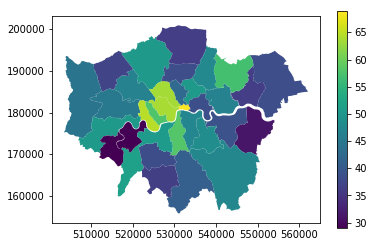

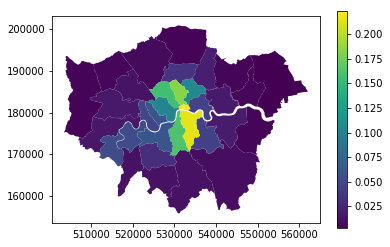

In [54]:
gdf = gpd.read_file(home_dir + '/london-cycle-traffic-air-quality.json')
gdf.to_crs(epsg=27700).plot(column='NitrogenDioxide',
                        cmap='viridis', linewidth=0.1, legend=True)

gdf.to_crs(epsg=27700).plot(column='BicycleFraction',
                        cmap='viridis', linewidth=0.1, legend=True)




## Step 6: Creating a recipe of our own

We are now in a better shape to start experimenting with different importers fields. So lets try to change our subject geometry to something other than polygons. For the recipe below we will be using **OSMImporter** to import the openstreetmap elements having the tag **"OSMHighways"**. Please have a look at the java class importer.osm.OSMImporter in the Digital Connector codebase to see other options.



We will combine this with our air quality data by assigning at each geometry the closest air quality value.

In [ ]:
### First lets specify our subject geometries. We will be using the london local authority boundaries to subset our
### OSM and air quality subjects by using a geo_relation='within'. Have a look at the Digital Connector codebase for
### other spatial join relationships
subject_geometry_la = Subject(subject_type_label='localAuthority', provider_label='uk.gov.ons',
                  match_rule=Match_Rule(attribute_to_match_on="label", pattern="E090000%"))

subject_geometry_osm = Subject(provider_label='org.openstreetmap',
                           subject_type_label='OSMEntity',
                           geo_match_rule=Geo_Match_Rule(geo_relation='within',subjects=[subject_geometry_la]))

subject_geometry_laq = Subject(provider_label='erg.kcl.ac.uk',subject_type_label='airQualityControl',
                              geo_match_rule=Geo_Match_Rule(geo_relation='within',subjects=[subject_geometry_la]))


### We can now define our importers. 

osm_importer = Datasource(importer_class='uk.org.tombolo.importer.osm.OSMImporter',
                          datasource_id='OSMHighways',
                          geography_scope = ["europe/great-britain/england/greater-london"])

airQualityControl = Datasource(importer_class='uk.org.tombolo.importer.lac.LAQNImporter',
                               datasource_id='airQualityControl')

localAuthority = Datasource(importer_class='uk.org.tombolo.importer.ons.OaImporter',
                            datasource_id='localAuthority')


### Lets build our attributes. This time we will be usig a MapToNearestSubjectField to assign the values of 
### london air quality data to our export subject geometry which in this case is the OSM geometries with "highways" tag

no_2_attribute = AttributeMatcher(provider='erg.kcl.ac.uk',
                                     label='NO2 40 ug/m3 as an annual mean')

no_2_field = LatestValueField(attribute_matcher=no_2_attribute,
                         label='NO2 40 ug/m3 as an annual me')

g_no_2_field = MapToNearestSubjectField(field=no_2_field,
                                        label='NitrogenDioxide',
                                        subject = subject_geometry_laq,
                                        max_radius = 1.)

### For demonstration purposes, we assign a constant value of "1" to all OSM elements. This might be usefull in 
### other applications such as counting the number of elements within a polygon during a geographic aggregation. 
### We use another field class to achieve that which is the FixedAnnotationField. There are many more field classes
### to explore, details can be found in the Digital Connector codebase.

osm_roads_field = AttributeMatcherField(field=ConstantField(value="1"),
                                        attributes=[AttributeMatcher(provider='org.openstreetmap',
                                                                     label='highways')],
                                        label='highways')

dataset = Dataset(subjects=[subject_geometry_osm], fields=[osm_roads_field, g_no_2_field],
                  datasources=[localAuthority, osm_importer, airQualityControl])

recipe = Recipe(dataset)
recipe.build_recipe(output_location=None,
                   console_print=False)

recipe.run_recipe(tombolo_path=home_dir + dc_dir,
                  clear_database_cache=False,
                  output_path = home_dir + '/osm-air-quality.json')


Lets check out the result. As before, we load it with geopandas 

In [68]:
import geopandas as gpd
gdf = gpd.read_file(home_dir + '/osm-air-quality.json')
gdf.head()

,name,highways,label,NitrogenDioxide,geometry
0,Bethnal Green Health Centre,0,osm48705631,44.0,POINT (-0.06419999999999999 51.527)
1,Perivale Dental Practice,0,osm60269652,42.0,POINT (-0.3232 51.5338)
2,,0,osm294277228,0.0,POINT (-0.1523 51.4166)
3,National Hospital for Neurology and Neurosurgery,0,osm60660743,48.0,POINT (-0.1224 51.5222)
4,,0,osm94244330,44.0,POINT (-0.0572 51.5199)


You will notice that the export contains lots of different geometries/tag names, and not all of them relate to highways. This is one inherent limitation of OSM data that use user defined tags for different amenities. 

Lets plot our results with geopandas

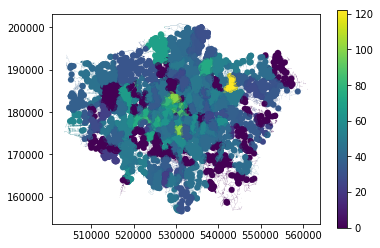

In [69]:
from matplotlib import pyplot as plt
%matplotlib inline
gdf.to_crs(epsg=27700).plot(column='NitrogenDioxide',
                        cmap='viridis', linewidth=0.1, legend=True)

